In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df.columns.value_counts()

Restaurant ID           1
Currency                1
Rating text             1
Rating color            1
Aggregate rating        1
Price range             1
Switch to order menu    1
Is delivering now       1
Has Online delivery     1
Has Table booking       1
Average Cost for two    1
Restaurant Name         1
Cuisines                1
Latitude                1
Longitude               1
Locality Verbose        1
Locality                1
Address                 1
City                    1
Country Code            1
Votes                   1
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#finding missing values

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Deteting null values

In [15]:
[feature for feature in df.columns if df[feature].isnull().sum()>0]

['Cuisines']

<Axes: >

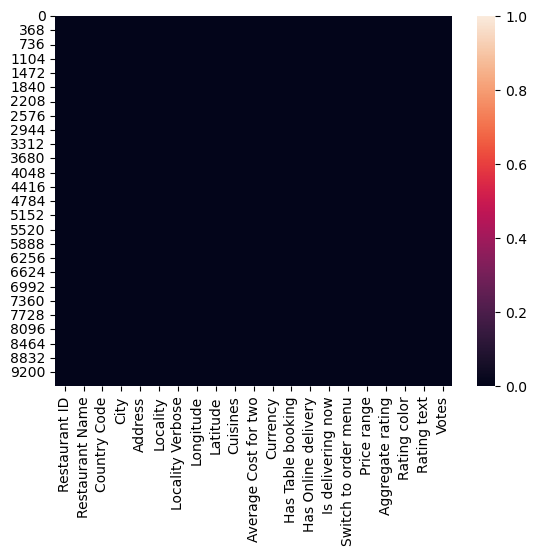

In [16]:
sns.heatmap(df.isnull())

In [21]:
country = pd.read_excel(r'Country-Code.xlsx')
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [20]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Merging two dataframes

In [23]:
final_df=pd.merge(df,country,on='Country Code',how='left')

In [26]:
final_df.head().T

,0,1,2,3,4
Restaurant ID,6317637,6304287,6300002,6318506,6314302
Restaurant Name,Le Petit Souffle,Izakaya Kikufuji,Heat - Edsa Shangri-La,Ooma,Sambo Kojin
Country Code,162,162,162,162,162
City,Makati City,Makati City,Mandaluyong City,Mandaluyong City,Mandaluyong City
Address,"Third Floor, Century City Mall, Kalayaan Avenu...","Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Third Floor, Mega Fashion Hall, SM Megamall, O...","Third Floor, Mega Atrium, SM Megamall, Ortigas..."
Locality,"Century City Mall, Poblacion, Makati City","Little Tokyo, Legaspi Village, Makati City","Edsa Shangri-La, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City"
Locality Verbose,"Century City Mall, Poblacion, Makati City, Mak...","Little Tokyo, Legaspi Village, Makati City, Ma...","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","SM Megamall, Ortigas, Mandaluyong City, Mandal...","SM Megamall, Ortigas, Mandaluyong City, Mandal..."
Longitude,121.027535,121.014101,121.056831,121.056475,121.057508
Latitude,14.565443,14.553708,14.581404,14.585318,14.58445
Cuisines,"French, Japanese, Desserts",Japanese,"Seafood, Asian, Filipino, Indian","Japanese, Sushi","Japanese, Korean"


To Check datatypes

In [28]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

return the index

In [103]:
country_name= final_df.Country.value_counts().index

return values 

In [48]:
country_values=final_df.Country.value_counts().values

In [47]:
a

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x1bb58942e60>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94%'),
  Text(0.5876082086391032, -0.12131196618612707, '5%'),
  Text(0.5997744629358018, -0.01644972978715676, '1%')])

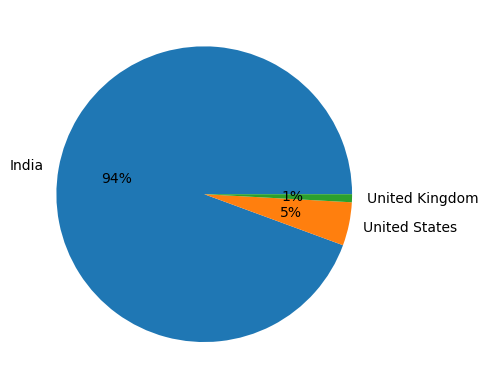

In [53]:
plt.pie(country_values[:3],labels=country_name[:3],autopct='%1.f%%')

#Observation : Zomato maximum records or transcations from india after that USA and UK

In [56]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [58]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

Coverting group by object into dataframe and adding one new coulumn

In [61]:
ratings=final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating count'})

##Observation
1.when Rating is between 4.5 to 4.9 its excellent

2.When rating is between 4.0 to 4.5 its very Good

3.When rating is between 3.5 to 3.9 its Good

4.When rating is between 3.0 to 3.4 is average

5.When rating is between 2.0 to 2.4
 
6.When rating is between 2.0 to 2.4

In [62]:
ratings.head(1)

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148


<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

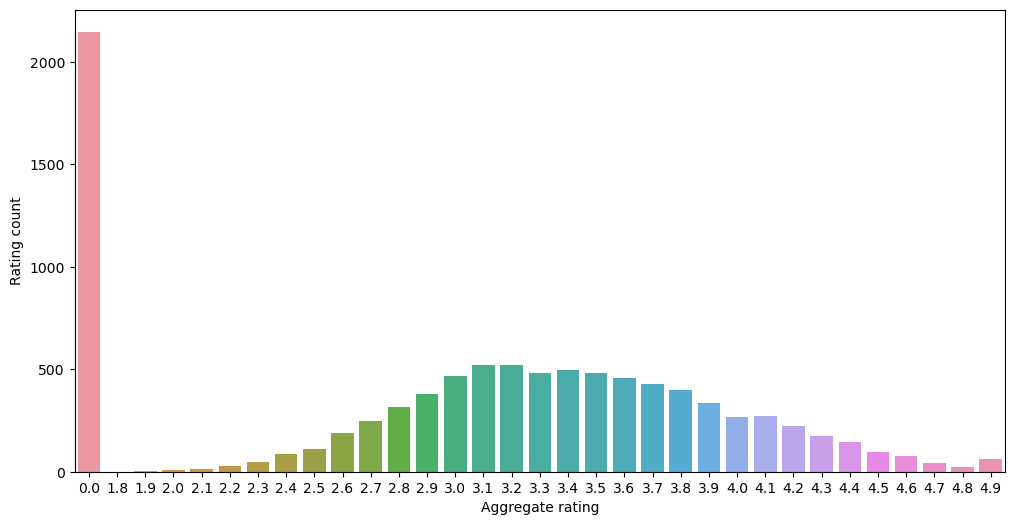

In [67]:

plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y='Rating count', data=ratings)

same plot want to add rating colors also

<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

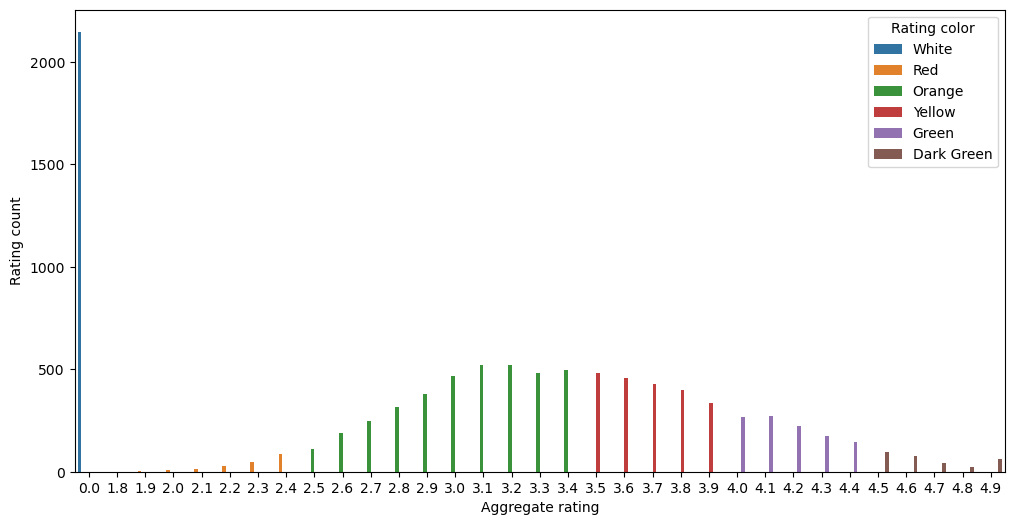

In [76]:
sns.barplot(x='Aggregate rating',y='Rating count',hue='Rating color', data=ratings)

Observation

1.not rated count is very high

2.maximum number is ratings between 2.5 to 3.4

<Axes: xlabel='Rating color', ylabel='count'>

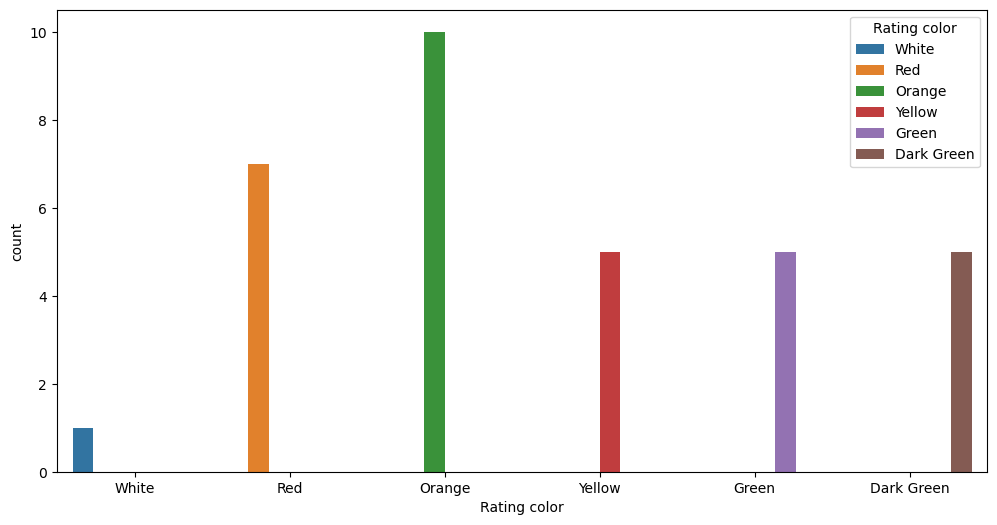

In [82]:
sns.countplot(x='Rating color',hue='Rating color', data=ratings)

###find the country names that has given zero ratings

In [87]:
final_df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [107]:
final_df[final_df['Aggregate rating']==0].groupby('Country').size().reset_index().rename(columns={0:'count'})

,Country,count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


##Observations 
maximum number of zero ratings from india

##Q2 - Which currency is used by which country

In [112]:
final_df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


##Q3 - Which country do have online delivery option?

In [113]:
final_df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [119]:
final_df[final_df['Has Online delivery']=='Yes'].groupby('Country').size()

Country
India    2423
UAE        28
dtype: int64

##Create a pie chart for cities distributions

In [128]:
city_name = final_df.City.value_counts().index
city_value = final_df.City.value_counts().values

([<matplotlib.patches.Wedge at 0x1bb60f03d90>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '69%'),
  Text(0.0340186500653484, -0.5990348332507311, '14%'),
  Text(0.47940246685229276, -0.36079533641101336, '14%'),
  Text(0.5957573682667329, -0.07122610585941394, '3%'),
  Text(0.5999706981848791, -0.005929698099289049, '0%')])

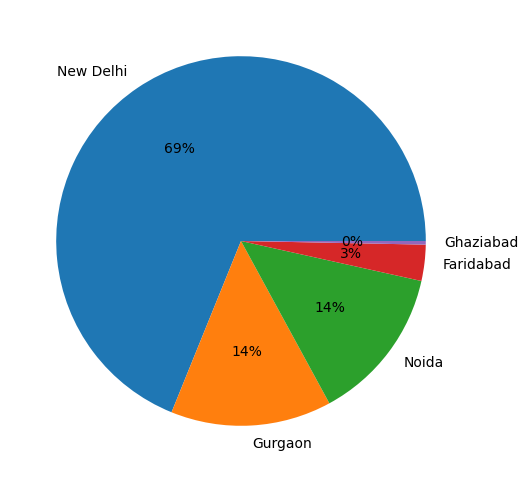

In [132]:
plt.pie(city_value[0:5],labels=city_name[0:5],autopct='%1.f%%')

##Q5 - Top 10 cusinies

In [133]:
final_df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [134]:
final_df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object